# Адаптер
Адаптер -- это структурный паттерн проектирования, который позволяет объектами с несовместимыми интерфейсами работать вместе.

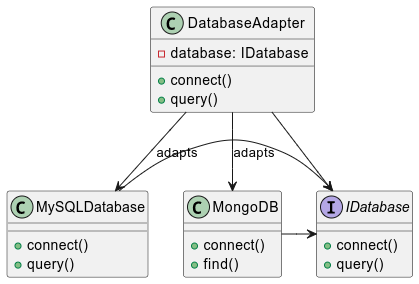

В данном примере мы имеем две разные базы данных - MySQL и MongoDB, которые имеют разный интерфейс взаимодействия. Для того чтобы использовать их в едином проекте, мы создаем адаптер - класс DatabaseAdapter, который реализует интерфейс IDatabase и содержит объект базы данных (MySQL или MongoDB) внутри себя. 

## Реализация в Python

Создадим классы для баз данных:

In [1]:
from abc import ABC, abstractmethod

class IDatabase(ABC):
    @abstractmethod
    def connect(self):
        pass
    
    @abstractmethod
    def query(self, sql):
        pass

class MySQLDatabase(IDatabase):
    def connect(self):
        print("Connecting to MySQL database...")
    
    def query(self, sql):
        print(f"Executing SQL query on MySQL database: {sql}")

class MongoDB(IDatabase):
    def connect(self):
        print("Connecting to MongoDB...")
    
    def query(self, query):
        print(f"Executing MongoDB query: {query}")

class DatabaseAdapter(IDatabase):
    def __init__(self, db):
        self.database = db
    
    def connect(self):
        self.database.connect()
    
    def query(self, sql_or_query):
        if isinstance(self.database, MySQLDatabase):
            self.database.query(sql_or_query)
        elif isinstance(self.database, MongoDB):
            self.database.query(sql_or_query)

Реализуем пример использования:

In [2]:
mysql_db = MySQLDatabase()
mongo_db = MongoDB()

adapter1 = DatabaseAdapter(mysql_db)
adapter1.connect()
adapter1.query("SELECT * FROM users")

adapter2 = DatabaseAdapter(mongo_db)
adapter2.connect()
adapter2.query({"name": "John"})


Connecting to MySQL database...
Executing SQL query on MySQL database: SELECT * FROM users
Connecting to MongoDB...
Executing MongoDB query: {'name': 'John'}
